<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Chapter 3

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlretrieve
from io import StringIO
import geopandas as gpd
from shapely.geometry import Point
import folium

In [4]:
neighborhoods_path = 'https://assets.datacamp.com/production/repositories/2409/datasets/a534dea1e6a99373a5a8e9c2060ad8fb6b74e13c/neighborhoods.geojson' 
neighborhoods = gpd.read_file(neighborhoods_path)
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
name        288 non-null object
geometry    288 non-null geometry
dtypes: geometry(1), object(1)
memory usage: 4.6+ KB


In [18]:
idx = neighborhoods.name.str.match('.*Urban.*')
urban_polygon = neighborhoods[idx].set_index('name')

In [19]:
# Print the head of the urban polygon 
print(urban_polygon.head())

# Create a copy of the urban_polygon using EPSG:3857 and print the head
urban_poly_3857 = urban_polygon.to_crs(epsg = 3857)
print(urban_poly_3857.head())

# Print the area of urban_poly_3857 in kilometers squared
area = urban_poly_3857.geometry.area / 10**6
print('The area of the Urban Residents neighborhood is ', area[0], ' km squared')

                                                          geometry
name                                                              
Urban Residents  (POLYGON ((-86.78122053774267 36.1645653773768...
                                                          geometry
name                                                              
Urban Residents  (POLYGON ((-9660441.280680289 4323289.00479539...
The area of the Urban Residents neighborhood is  1.1289896057982676  km squared


In [29]:
type(urban_poly_3857.geometry.centroid)

geopandas.geoseries.GeoSeries

<class 'geopandas.geoseries.GeoSeries'>


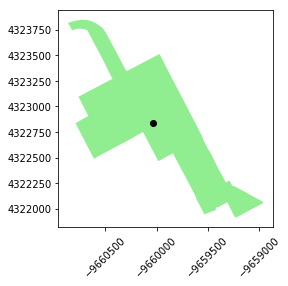

In [30]:
# Create downtown_center from urban_poly_3857
downtown_center = urban_poly_3857.geometry.centroid

# Print the type of downtown_center 
print(type(downtown_center))

# Plot the urban_poly_3857 as ax and add the center point
ax = urban_poly_3857.plot(color = 'lightgreen')
downtown_center.plot(ax = ax, color = 'black')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

In [35]:
art_path = 'https://assets.datacamp.com/production/repositories/2409/datasets/284dd5ef16418d161af519d30ecc8471a23210ea/public_art.csv'
art = pd.read_csv(art_path)
art.columns = ['title', 'last_name', 'first_name', 'address', 'medium', 'type', 'desc', 'lat', 'lng', 'loc']
art['geometry'] = art.apply(lambda x: Point((x.lng, x.lat)), axis=1)
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
title         132 non-null object
last_name     132 non-null object
first_name    122 non-null object
address       131 non-null object
medium        128 non-null object
type          132 non-null object
desc          87 non-null object
lat           132 non-null float64
lng           132 non-null float64
loc           132 non-null object
geometry      132 non-null object
dtypes: float64(2), object(9)
memory usage: 11.4+ KB


In [49]:
center_point = downtown_center['Urban Residents']

In [50]:
# Import packages
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd

# Create art_dist_meters using art and the geometry from art
art_dist_meters = gpd.GeoDataFrame(art, geometry = art.geometry, crs = {'init': 'epsg:4326'})
print(art_dist_meters.head(2))

# Set the crs of art_dist_meters to use EPSG:3857
art_dist_meters.geometry = art_dist_meters.geometry.to_crs(epsg = 3857)
print(art_dist_meters.head(2))

# Add a column to art_meters, center
art_dist_meters['center'] = center_point

                             title last_name first_name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                             address  medium       type desc       lat  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture  NaN  36.12856   
1  333 Commerce Street, Nashville TN     NaN  Sculpture  NaN  36.16234   

        lng                    loc                             geometry  
0 -86.83660   (36.12856, -86.8366)            POINT (-86.8366 36.12856)  
1 -86.77774  (36.16234, -86.77774)  POINT (-86.77774000000001 36.16234)  
                             title last_name first_name  \
0          [Cross Country Runners]     Frost      Miley   
1  [Fourth and Commerce Sculpture]    Walker        Lin   

                             address  medium       type desc       lat  \
0     4001 Harding Rd., Nashville TN  Bronze  Sculpture  NaN  36.12856   
1  333 Commerce Street, Nashville TN     NaN  Sculp

In [53]:
# Import package for pretty printing
import pprint

# Build a dictionary of titles and distances for Urban Residents art
art_distances = {}
for row in art_dist_meters.iterrows():
    vals = row[1]
    key = vals['title']
    ctr = vals['center']
    art_distances[key] = vals['geometry'].distance(ctr)

# Pretty print the art_distances
pprint.pprint(art_distances)

{'12th & Porter Mural': 1269.150287911304,
 'A Splash of Color': 2471.774738456058,
 'A Story of Nashville': 513.5632030476819,
 'Aerial Innovations Mural': 4516.755210409467,
 'Airport Sun Project': 12797.594229782726,
 'Andrew Jackson': 948.9812821666546,
 'Angel': 10202.565989737886,
 'Anticipation': 688.8349105300488,
 'April Baby': 4779.394424948614,
 'Arial Triangle [from the Gravity Series]': 4315.322141144408,
 'Ariel': 4380.9277739551535,
 'Athena Parthenos': 4294.778095688652,
 'Benedictio': 5313.6242142909305,
 'Bicycle Bus-Green Fleet': 468.0828635562599,
 'Blowing Bubbles': 10202.565989737886,
 'Breaking Bread': 1279.2562933073418,
 'Building a Positive Community': 2253.4179974184162,
 'Can-Do': 5648.086322079543,
 'Chet Atkins': 604.4489448122729,
 "Children's Chairs For The Seasons": 513.5632030476819,
 'Confederate Memorial': 5313.6242142909305,
 'Confederate Private Monument': 4316.459103418228,
 'Confluence': 2918.5244121040123,
 'Cool Fences': 6491.846030114518,
 'Da

In [60]:
urban_polygon['center'] = urban_polygon['geometry'].centroid

In [66]:
# Print the head of the urban_polygon
print(urban_polygon.head())

# Create urban_center from the urban_polygon center
urban_center = urban_polygon.center[0]

# Print urban_center
print(urban_center)

# Create array for folium called urban_location
urban_location = [urban_center.y, urban_center.x]

# Print urban_location
print(urban_location)

                                                          geometry  \
name                                                                 
Urban Residents  (POLYGON ((-86.78122053774267 36.1645653773768...   

                                                       center  
name                                                           
Urban Residents  POINT (-86.77756457127047 36.16127820928791)  
POINT (-86.77756457127047 36.16127820928791)
[36.161278209287914, -86.77756457127047]


In [69]:
# Construct a folium map with urban_location
downtown_map = folium.Map(location = urban_location, zoom_start = 15)

# Display the map
display(downtown_map)

In [70]:
# Create array for called folium_loc from the urban_polygon center point
point = urban_polygon.center[0]
folium_loc = [point.y, point.x]

# Construct a map from folium_loc: downtown_map
downtown_map = folium.Map(location = folium_loc, zoom_start = 15)

# Draw our neighborhood: Urban Residents
folium.GeoJson(urban_polygon.geometry).add_to(downtown_map)

# Display the map
display(downtown_map)

In [77]:
# Create a geometry column from lng & lat
art['geometry'] = art.apply(lambda x: Point(float(x.lng), float(x.lat)), axis=1)

# Create a GeoDataFrame from art and verify the type
art_geo = gpd.GeoDataFrame(art, crs = neighborhoods.crs, geometry = art.geometry)

# Spatially join neighborhoods with art_geo
neighborhood_art = gpd.sjoin(art_geo, neighborhoods, op = "within")

# Create urban_art from neighborhood_art where the neighborhood name is Urban Residents
urban_art = neighborhood_art.loc[neighborhood_art.name == 'Urban Residents']

In [80]:
# Iterate through the urban_art and print each part of tuple returned
for row in urban_art.iterrows():
  print('first part: ', row[0])
  print('second part: ', row[1])

# Create a location and marker with each iteration for the downtown_map
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    marker = folium.Marker(location = location)
    marker.add_to(downtown_map)

# Display the map
display(downtown_map)

first part:  1
second part:  title                       [Fourth and Commerce Sculpture]
last_name                                            Walker
first_name                                              Lin
address                   333 Commerce Street, Nashville TN
medium                                                  NaN
type                                              Sculpture
desc                                                    NaN
lat                                                 36.1623
lng                                                -86.7777
loc                                   (36.16234, -86.77774)
geometry                POINT (-86.77774000000001 36.16234)
center         POINT (-9660034.312198792 4322835.782813122)
index_right                                              41
name                                        Urban Residents
Name: 1, dtype: object
first part:  4
second part:  title                                       A Story of Nashville
last_name     

In [82]:
# Print the urban_art titles
print(urban_art.title)

#Print the urban_art descriptions
print(urban_art.desc)

# Replace Nan and ' values in description
urban_art.desc.fillna('', inplace = True)
urban_art.desc = urban_art.desc.str.replace("'", "`")

#Print the urban_art descriptions again
print(urban_art.desc)

1                        [Fourth and Commerce Sculpture]
4                                   A Story of Nashville
21                                           Chet Atkins
22                     Children's Chairs For The Seasons
34                                       Foliated Scroll
39                                          Gone Fishing
40                             Happy Times at The Arcade
54                                     Johnny Cash Mural
55                                 La Storia della Terra
57                                 Les Paul Guitar Mural
59                                         Library Doors
60                               Lightning Wire Fountain
66     Nashville, A History through Maps and Aerial V...
67                                               Oh, Roy
68                                  Orpheus and Eurydice
75                               Piecing It All Together
104                                  The Birth of Apollo
105                            

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [124]:
urban_art.desc = urban_art.desc.str.replace("`", "'")

# Get just the Urban Residents neighborhood polygon and save it as urban_polygon
urban_polygon = neighborhoods.loc[neighborhoods.name == "Urban Residents"]

nashville = [36.16127820928791, -86.77756457127047]

/Users/Brian/anaconda3/envs/datacamp/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [126]:
# Construct downtown map
downtown_map = folium.Map(location = nashville, zoom_start = 15)
folium.GeoJson(urban_polygon).add_to(downtown_map)

# Create popups inside the loop you built to create the markers
for row in urban_art.iterrows():
    row_values = row[1] 
    location = [row_values['lat'], row_values['lng']]
    popup = (str(row_values['title'])
             + ': ' + str(row_values['desc'])).replace("'", "")
    marker = folium.Marker(location = location, popup = popup)
    marker.add_to(downtown_map)

# Display the map.
display(downtown_map)